Epoch [1/10], Train Loss: 1.3922
Epoch [2/10], Train Loss: 1.3883
Epoch [3/10], Train Loss: 1.3887
Epoch [4/10], Train Loss: 1.3884
Epoch [5/10], Train Loss: 1.3879
Epoch [6/10], Train Loss: 1.3871
Epoch [7/10], Train Loss: 1.3872
Epoch [8/10], Train Loss: 1.3870
Epoch [9/10], Train Loss: 1.3872
Epoch [10/10], Train Loss: 1.3874
Test Loss: 1.3865, Test Accuracy: 0.2880


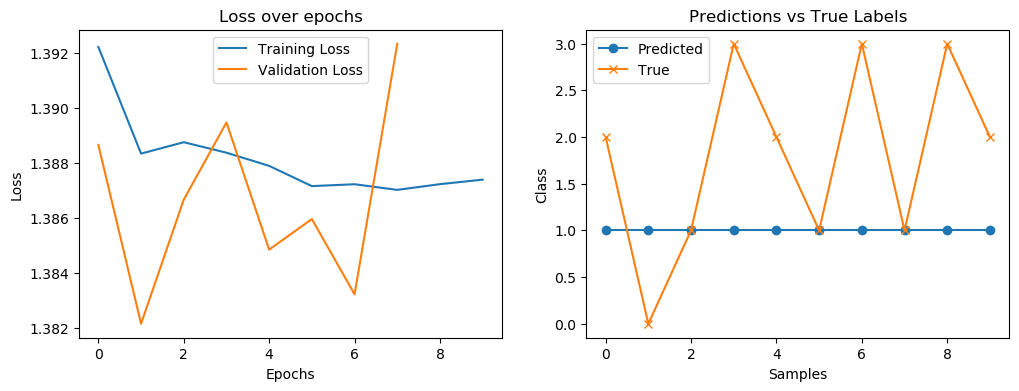

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from Model import *
# 设置随机种子以确保结果可重复性
np.random.seed(42)
torch.manual_seed(42)

def generate_random_data(num_samples, sequence_length, input_dim, num_classes):
    """
    生成随机数据
    :param num_samples: 样本数量
    :param sequence_length: 序列长度
    :param input_dim: 输入维度
    :param num_classes: 类别数量
    :return: 训练数据和测试数据
    数据集这种有num_samples个样本,每个样本有sequence_length个时间步,每个时间步有input_dim个特征
    每个样本的标签是num_classes维的one-hot向量
    """
    X_train = np.random.rand(num_samples, sequence_length, input_dim).astype(np.float32)
    y_train_labels = np.random.randint(0, num_classes, size=(num_samples,))
    y_train = np.eye(num_classes)[y_train_labels].astype(np.float32)

    num_test_samples = int(num_samples * 0.25)
    X_test = np.random.rand(num_test_samples, sequence_length, input_dim).astype(np.float32)
    y_test_labels = np.random.randint(0, num_classes, size=(num_test_samples,))
    y_test = np.eye(num_classes)[y_test_labels].astype(np.float32)

    return X_train, y_train, X_test, y_test

def create_dataloaders(X_train, y_train, X_test, y_test, batch_size):
    """
    创建DataLoader
    :param X_train: 训练数据
    :param y_train: 训练标签
    :param X_test: 测试数据
    :param y_test: 测试标签
    :param batch_size: 批量大小
    :return: 训练和测试的DataLoader
    """
    train_dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    """
    训练模型
    :param model: 模型
    :param train_loader: 训练数据加载器
    :param criterion: 损失函数
    :param optimizer: 优化器
    :param num_epochs: 训练轮数
    :return: 训练损失列表
    """
    train_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}')
    return train_losses

def validate_model(model, test_loader, criterion):
    """
    验证模型
    :param model: 模型
    :param test_loader: 测试数据加载器
    :param criterion: 损失函数
    :return: 验证损失列表
    """
    model.eval()
    val_losses = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())
    return val_losses

def test_model(model, test_loader, criterion):
    """
    测试模型
    :param model: 模型
    :param test_loader: 测试数据加载器
    :param criterion: 损失函数
    :return: 测试损失和准确率
    """
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            _, true_labels = torch.max(labels, 1)
            correct += (predicted == true_labels).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')
    return test_loss, accuracy

def visualize_results(train_losses, val_losses, predicted_labels, true_labels_list):
    """
    可视化结果
    :param train_losses: 训练损失列表
    :param val_losses: 验证损失列表
    :param predicted_labels: 预测标签列表
    :param true_labels_list: 真实标签列表
    """
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(predicted_labels[:10], 'o-', label='Predicted')
    plt.plot(true_labels_list[:10], 'x-', label='True')
    plt.title('Predictions vs True Labels')
    plt.xlabel('Samples')
    plt.ylabel('Class')
    plt.legend()

    plt.show()

def main():
    # 生成随机数据
    num_samples = 1000
    sequence_length = 50
    input_dim = 10
    num_classes = 4
    X_train, y_train, X_test, y_test = generate_random_data(num_samples, sequence_length, input_dim, num_classes)

    # 创建DataLoader
    batch_size = 32
    train_loader, test_loader = create_dataloaders(X_train, y_train, X_test, y_test, batch_size)

    # 定义模型参数(可不定义)
    input_dim = 10
    hidden_dim = 64
    num_classes = 4
    num_heads = 8

    # 初始化模型
    model = BiLSTM_GRU_Attention(input_dim, hidden_dim, num_classes, num_heads)

    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 训练模型
    num_epochs = 10
    train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs)

    # 验证模型
    val_losses = validate_model(model, test_loader, criterion)

    # 测试模型
    test_loss, accuracy = test_model(model, test_loader, criterion)

    # 获取前10个批次的预测和真实标签
    predicted_labels = []
    true_labels_list = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            _, true_label = torch.max(labels, 1)
            predicted_labels.extend(preds.numpy())
            true_labels_list.extend(true_label.numpy())
            if len(predicted_labels) >= 10:
                break

    # 可视化结果
    visualize_results(train_losses, val_losses, predicted_labels, true_labels_list)

if __name__ == "__main__":
    main()